### THE SPARKS FOUNDATION

<i><b>TASK 1: Predict the percentage of an student based on the no.of study hours using Supervised Machine Learning</b></i>

<i><b> Submitted by: SUSMA R </b></i>

In [34]:
# Importing the required libraries in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [35]:
# Import the dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("The data imported successfully")

The data imported successfully


In [36]:
# Quick view about dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
data.shape

(25, 2)

In [39]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [41]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

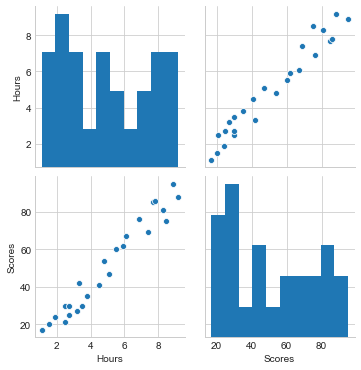

In [43]:
sns.pairplot(data)

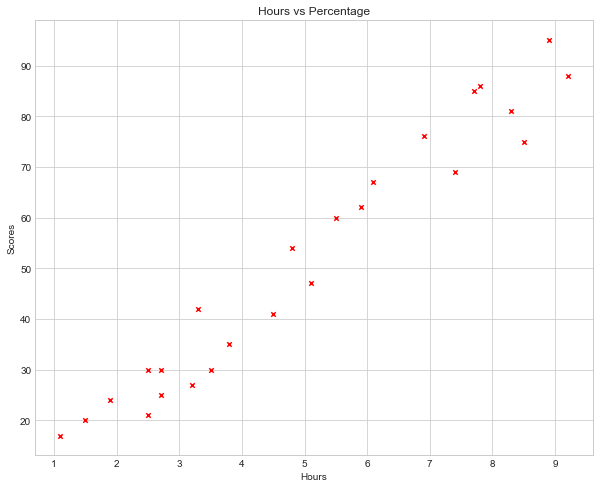

In [44]:
# DATA VISUALIZATION
data.plot(kind='scatter',x='Hours', y='Scores',title='Hours vs Percentage',marker='x',color='red',figsize=[10,8])
plt.show()

In [20]:
# Correlation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b>Splitting the data into Dependent and Independaent Variables</B>

In [45]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

<b>Training and Testing the data</b>

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/5, random_state=0)
print("x_train :",x_train)
print("x_test :",x_test)
print("y_train :",y_train)
print("y_test :",y_test)

x_train : [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
x_test : [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_train : [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
y_test : [20 27 69 30 62]


In [48]:
print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


In [49]:
# Training the algorithm

model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print("Training completed")

[9.91065648]
Training completed


<b>Visualizing the model</b>

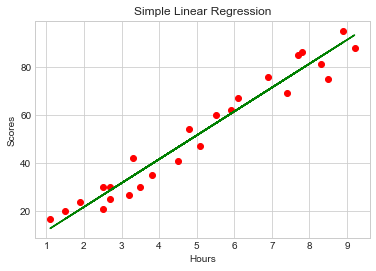

In [50]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y,color='red')
plt.plot(x, line,color='green');
plt.title('Simple Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<b> Checking the Accuracy</b>

In [51]:
print('Test Score')
print(model.score(x_test, y_test))
print('Training Score')
print(model.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


<b> Making prediction using our model</b>

In [52]:
print(x_test)
y_predict = model.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [53]:
df= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


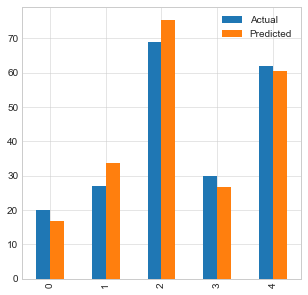

In [60]:
# Depict the difference between predicted and actual values

df.plot(kind='bar',figsize=[5,5])
plt.grid(which='major',linewidth='0.5')
plt.grid(which='minor',linewidth='0.5')
plt.show()

<b>What will be the predicted score if a student studies for 9.25 hrs/day?</b>

In [30]:
def percentage(score,hours=9.25):
    print("The predicted score if a student studies for {} hrs/day is {}".format(hours,score))
percentage(model.predict([[9.25]]))

The predicted score if a student studies for 9.25 hrs/day is [93.69173249]


<i>From the above result we can say that if a student studied for 9.25 hrs/day then the student will secure 93.69 marks</i>

<b> Evaluating the model</b>

Evaluating the performance of the algorithm is the final step. Here the evaluation metrics used in this regression algorithms are:

1)Mean Absolute Error

2)Mean Squares Error

3)Root Mean Squared Error

In [91]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score :', metrics.r2_score(y_test,y_predict))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Squared Error : 4.6474476121003665
R2 Score : 0.9454906892105356
